In [1]:
from urllib.request import urlopen
from pyspark.sql import SparkSession, functions as F
import string

In [2]:
import hashlib

def hash_util(obj) -> str:
    return hashlib.md5(str(obj).encode("utf-8")).hexdigest()

In [3]:
url = "https://raw.githubusercontent.com/kingspp/mlen_assignment/main/data.json"

jsonData = urlopen(url).read().decode('utf-8')

In [4]:
import json
sample_data = json.loads(jsonData)[:5]
sample_data

[{'jira_ticket_id': 0,
  'completed': 'yes',
  'date': '2023-03-18',
  'num_slack_messages': 237,
  'num_hours': 22.898463229813657,
  'engineer': 'Sandra',
  'ticket_description': 'reclusive initiate horseflesh Martinique crucify Julio blacktop benefit designate firebreak anise condescension page Acadia bevel skyscrape senile peacemake eft whimsic crossbar Goode comic flip sustain abstention',
  'KPIs': [{'initiative': 'New Customer', 'new_revenue': 4349.905217024631}],
  'lines_per_repo': [{'G': 52}, {'O': 23}, {'H': 31}]},
 {'jira_ticket_id': 1,
  'completed': True,
  'date': '2023-03-31',
  'num_slack_messages': 276,
  'num_hours': 62.13453815065962,
  'engineer': 'Dale',
  'ticket_description': 'Taurus both absentia Lavoisier mustache crossroad steppe suspend German necrosis debunk Humphrey eugenic differentiate audacity rodeo Steiner indiscreet Passover moonlight shadow Merriam driftwood viviparous twosome professorial',
  'KPIs': [{'initiative': 'Efficiency', 'new_revenue': 5295

In [5]:
!which python3.9

/usr/local/bin/python3.9


In [6]:
import os

os.environ["PYSPARK_PYTHON"]="/usr/local/bin/python3.9"

os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/local/bin/python3.9"


In [7]:
os.environ.get('PYSPARK_PYTHON'), os.environ.get('PYSPARK_DRIVER_PYTHON')

('/usr/local/bin/python3.9', '/usr/local/bin/python3.9')

In [8]:
spark = SparkSession.builder.getOrCreate()

rdd = spark.sparkContext.parallelize([jsonData])
df = spark.read.json(rdd)

24/07/30 22:24:31 WARN Utils: Your hostname, santhoshs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.8 instead (on interface en0)
24/07/30 22:24:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/30 22:24:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/07/30 22:24:41 WARN TaskSetManager: Stage 0 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.
24/07/30 22:24:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [9]:
df.count()

24/07/30 22:24:48 WARN TaskSetManager: Stage 1 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


100000

In [10]:
sample_df = df.where(F.col('jira_ticket_id').isNotNull())

sample_df.count()

24/07/30 22:24:51 WARN TaskSetManager: Stage 4 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


100000

In [11]:
df.first()

24/07/30 22:24:53 WARN TaskSetManager: Stage 8 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


Row(KPIs=[Row(initiative='New Customer', new_revenue=4349.905217024631)], completed='yes', date='2023-03-18', engineer='Sandra', jira_ticket_id=0, lines_per_repo=[Row(A=None, B=None, C=None, D=None, E=None, F=None, G=52, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=23, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=31, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None)], num_hours=22.898463229813657, num_slack_messages=237, ticket_description='reclusive initiate horseflesh Martinique crucify Julio blacktop benefit designate firebreak anise condescension page Acadia bevel

In [12]:
df.printSchema()

root
 |-- KPIs: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- initiative: string (nullable = true)
 |    |    |-- new_revenue: double (nullable = true)
 |-- completed: string (nullable = true)
 |-- date: string (nullable = true)
 |-- engineer: string (nullable = true)
 |-- jira_ticket_id: long (nullable = true)
 |-- lines_per_repo: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- A: long (nullable = true)
 |    |    |-- B: long (nullable = true)
 |    |    |-- C: long (nullable = true)
 |    |    |-- D: long (nullable = true)
 |    |    |-- E: long (nullable = true)
 |    |    |-- F: long (nullable = true)
 |    |    |-- G: long (nullable = true)
 |    |    |-- H: long (nullable = true)
 |    |    |-- I: long (nullable = true)
 |    |    |-- J: long (nullable = true)
 |    |    |-- K: long (nullable = true)
 |    |    |-- L: long (nullable = true)
 |    |    |-- M: long (nullable = true)
 |    |    |-- N: lo

In [13]:
df.head(2)

24/07/30 22:24:56 WARN TaskSetManager: Stage 10 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(KPIs=[Row(initiative='New Customer', new_revenue=4349.905217024631)], completed='yes', date='2023-03-18', engineer='Sandra', jira_ticket_id=0, lines_per_repo=[Row(A=None, B=None, C=None, D=None, E=None, F=None, G=52, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=23, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=31, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None)], num_hours=22.898463229813657, num_slack_messages=237, ticket_description='reclusive initiate horseflesh Martinique crucify Julio blacktop benefit designate firebreak anise condescension page Acadia beve

## Q1 : What is the longest Jira ticket description?

In [14]:
##Brute Force Method

max_length = 0

for row in df.rdd.toLocalIterator():
        if len(row["ticket_description"]) > max_length:
            max_length = len(row["ticket_description"])
            long_ticket = row['ticket_description']

print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'ticket_description': long_ticket}])
print(res.collect())
hash_util(res.collect()) # "a0ef0d383ff7ee8a3af1669f9a8e0f14"

24/07/30 22:24:58 WARN TaskSetManager: Stage 14 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


895
[Row(ticket_description='Carmela sibling musicology patron gunpoint Canfield mammal Santayana Freddie Waterhouse estuary eligible Todd bashaw repellent Jovanovich integrity windbreak halide pestilential italic desiccate Hanoverian Riordan Lathrop connotative ratify Chattanooga phenol enjoinder chase breakdown alkaloid homology cleric consistent pickle rather Barney dogma crocodile liaison endometrial embroider methodology within marketeer cope patrol paycheck Nevins Spokane theorem Jorgensen Wilma transoceanic Mansfield arboretum attribution chemistry Woodbury Cottrell prosodic lox fallacious tachyon coprocessor Furman putdown Pickford goose ignition icosahedral chemic reconnaissance aggravate marinade furthest converge Apocrypha formula cocky landlocked Hopkins stamp Bennington injudicious bulletin spontaneous whalebone prolific scavenge aliphatic balsam offprint shepherdess underling Banbury Rebecca flush')]


'a0ef0d383ff7ee8a3af1669f9a8e0f14'

In [15]:
longest_description_row = df.withColumn("description_length", F.length(F.col("ticket_description"))) \
                            .orderBy(F.col("description_length").desc())
longest_description_row = longest_description_row.select("ticket_description").limit(1)
longest_description_row.collect()
hash_util(longest_description_row.collect())

24/07/30 22:25:07 WARN TaskSetManager: Stage 17 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.
24/07/30 22:25:10 WARN TaskSetManager: Stage 18 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


'a0ef0d383ff7ee8a3af1669f9a8e0f14'

## Q2 : Which repo had the most lines of code added?

In [16]:
# Brute Force

max_length = 0

all_upper_chars = {char:0 for char in list(string.ascii_uppercase)}

for row in df.rdd.toLocalIterator():
    for repo in row['lines_per_repo']:
        for char in all_upper_chars:
            if repo[char]:
                all_upper_chars[char] += repo[char]

max_repo = max(all_upper_chars, key=all_upper_chars.get)

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'repo': max_repo}])
print(res.collect())
hash_util(res.collect()) # "7f2650ec9b6159c18eba65f65615740d"

24/07/30 22:25:12 WARN TaskSetManager: Stage 22 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(repo='Z')]


'7f2650ec9b6159c18eba65f65615740d'

In [17]:
repos_df = df.selectExpr("inline(lines_per_repo)")

sum_expr = [F.expr(f"sum({col}) as {col}") for col in repos_df.columns]
repo_lines_df = repos_df.agg(*sum_expr)
repo_lines_dict = repo_lines_df.collect()[0].asDict()

most_lines_repo = max(repo_lines_dict, key=repo_lines_dict.get)
total_lines = repo_lines_dict[most_lines_repo]

result_df = spark.createDataFrame([(most_lines_repo,total_lines)], ["repo", "total_lines"]).select("repo")
result_df.collect()

24/07/30 22:25:35 WARN TaskSetManager: Stage 25 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(repo='Z')]

## Q3 : Provide the maximum number of Slack messages in any ticket for each engineer

In [18]:
## Brute force

engineer_messages = {}

for row in df.rdd.toLocalIterator():
    if row['engineer']:
        engineer = row['engineer'].title()
    else:
        continue
    engineer_messages[engineer] = max(row['num_slack_messages'], engineer_messages.get(engineer, 0))

    
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{"engineer":key, "max_messages":value} for key, value in sorted(engineer_messages.items())])
print(res.collect())
hash_util(res.collect()) # "a237ab13f39d30d21b8b937359e9c01f"

24/07/30 22:25:39 WARN TaskSetManager: Stage 32 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(engineer='Alex', max_messages=500), Row(engineer='Daisy', max_messages=500), Row(engineer='Dale', max_messages=500), Row(engineer='Josh', max_messages=500), Row(engineer='Sandra', max_messages=500)]


'a237ab13f39d30d21b8b937359e9c01f'

In [19]:
## Spark operations 

engineer_messages = df.withColumn("engineer", F.initcap(F.col("engineer"))).filter(F.col("engineer").isNotNull())
engineer_messages = engineer_messages.groupBy("engineer").agg(F.max("num_slack_messages").alias('max_messages'))
engineer_messages = engineer_messages.orderBy(F.col("engineer"))
engineer_messages.collect()

print(engineer_messages.collect())
hash_util(engineer_messages.collect()) # "a237ab13f39d30d21b8b937359e9c01f"

24/07/30 22:25:47 WARN TaskSetManager: Stage 35 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(engineer='Alex', max_messages=500), Row(engineer='Daisy', max_messages=500), Row(engineer='Dale', max_messages=500), Row(engineer='Josh', max_messages=500), Row(engineer='Sandra', max_messages=500)]


'a237ab13f39d30d21b8b937359e9c01f'

## Q4 : Mean hours spent on a ticket in June 2023

### Explanation: 

1. I couldn't able to get the answer for this test case. 
2. I tried few scenarios by filtering the dates on June 2023.
3. I see that num_hours has negative values for some dates, so I tried by adding absolute values since num hours can't be zero, also by removing rows where num_hours <0.
4. Also I tried filtering on engineer column not null values. 
5. Please go through the rough sketch at the end of file with different approaches I tried.

In [20]:
## Brute Force

total_tickets = 0
total_hours = 0

for row in df.rdd.toLocalIterator():
    if row["date"] > '2023-05-31' and  row["date"] < "2023-07-01":
        total_hours+=row["num_hours"]
        total_tickets+=1
    
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{"mean_hours":total_hours/total_tickets}])
print(res.collect())
hash_util(res.collect()) # "a237ab13f39d30d21b8b937359e9c01f"

24/07/30 22:25:50 WARN TaskSetManager: Stage 52 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=49.23021832191624)]


'9ec619e27b5d9ae116a1e3ebd9eabd70'

In [21]:
## Brute Force

total_tickets = 0
total_hours = 0

for row in df.rdd.toLocalIterator():
    if row["date"] > '2023-05-31' and  row["date"] < "2023-07-01":
        total_hours+=abs(row["num_hours"])
        total_tickets+=1
    
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{"mean_hours":total_hours/total_tickets}])
print(res.collect())
hash_util(res.collect()) # "a237ab13f39d30d21b8b937359e9c01f"

24/07/30 22:25:57 WARN TaskSetManager: Stage 58 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=50.21016986391711)]


'a0ea59f7f871fafb14474ecc656aafe6'

In [22]:
## Brute Force

total_tickets = 0
total_hours = 0

for row in df.rdd.toLocalIterator():
    if row["date"] > '2023-05-31' and  row["date"] < "2023-07-01":
        total_hours+=max(0, row["num_hours"])
        total_tickets+=1
    
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{"mean_hours":total_hours/total_tickets}])
print(res.collect())
hash_util(res.collect()) # "a237ab13f39d30d21b8b937359e9c01f"

24/07/30 22:26:08 WARN TaskSetManager: Stage 64 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=49.72019409291667)]


'1e096a1a04ec7557cbd0f9d115d58745'

In [23]:
## Brute Force

total_tickets = 0
total_hours = 0

for row in df.rdd.toLocalIterator():
    if row["date"] > '2023-05-31' and  row["date"] < "2023-07-01":
        if row["num_hours"]>0:
            total_hours+=abs(row["num_hours"])
            total_tickets+=1
    
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{"mean_hours":total_hours/total_tickets}])
print(res.collect())
hash_util(res.collect()) # "a237ab13f39d30d21b8b937359e9c01f"

24/07/30 22:26:21 WARN TaskSetManager: Stage 70 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=50.224304209517776)]


'0a15804cce114a019e52b696bba68912'

In [24]:
## Pyspark operations

df_with_dates = df.withColumn("date_clean", F.to_date(df.date, "yyyy-MM-dd"))
df_with_dates = df_with_dates.filter(F.col("date_clean").isNotNull())

q4_filtered_df = df_with_dates.where((F.col("date_clean") > '2023-05-31') & (F.col("date_clean") < "2023-07-01"))
q4_filtered_df = q4_filtered_df.agg(F.mean("num_hours").alias("mean_hours"))
q4_filtered_df.collect()

24/07/30 22:26:30 WARN TaskSetManager: Stage 73 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=49.23021832191624)]

In [25]:
## Pyspark operations other way

june_tickets_df = df.filter((F.month(F.col("date")) == 6) & (F.year(F.col("date")) == 2023))
mean_hours_june_2023 = june_tickets_df.agg(F.avg("num_hours").alias("mean_hours"))
mean_hours_june_2023.collect()

24/07/30 22:26:35 WARN TaskSetManager: Stage 76 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=49.23021832191624)]

## Q5 : Total lines of code contributed by completed tickets to the repo 'A'

### Explanation: 

1. I couldn't able to get the answer for this test case also. 
2. I see that completed can have 5 distunct values and I tried few scenarios by filtering the completed on different values.
3. Since lines per repo is struct, I applied inline function and aggregated the total lines of repo A.
4. Also I tried filtering on engineer column not null values. 
5. Please go through the rough sketch at the end of file with different approaches I tried.

In [26]:
df.select('completed').distinct().show()

24/07/30 22:26:37 WARN TaskSetManager: Stage 79 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+---------+
|completed|
+---------+
|     null|
|    false|
|       no|
|      yes|
|     true|
+---------+



In [27]:
## Brute Force

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["true"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
print(res.collect())
hash_util(res.collect()) # "6adec64b2a723c9a52024c53068f264d"

24/07/30 22:26:40 WARN TaskSetManager: Stage 85 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=163514)]


'e1a9890b418c742d20f84c200083b38c'

In [28]:
## Brute Force

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["yes"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
print(res.collect())
hash_util(res.collect()) # "6adec64b2a723c9a52024c53068f264d"

24/07/30 22:26:48 WARN TaskSetManager: Stage 91 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=84045)]


'bc379403667b20f66994cf05dda7192a'

In [29]:
line_per_repo = df.selectExpr("inline(lines_per_repo)")
completed_tickets = line_per_repo.where((F.col("completed") == 'true')).agg(F.sum("A").alias("total"))
completed_tickets.collect()

24/07/30 22:26:58 WARN TaskSetManager: Stage 94 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=163514)]

In [30]:
line_per_repo = df.select(F.inline(df['lines_per_repo']))
completed_tickets = line_per_repo.where((F.col("completed") == 'true')).agg(F.sum("A").alias("total"))
completed_tickets.collect()

24/07/30 22:27:01 WARN TaskSetManager: Stage 97 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=163514)]

## Q6 : Total new revenue per engineer per company initiative

### Explanation: 

1. I couldn't able to get the answer for this test case also. 
2. As mentioned in the hint, I filtered the result by engineer and order b

In [ ]:
## Brute Force

engineer_revenue = {}

for row in df.rdd.toLocalIterator():
    if row['engineer']:
        engineer = row['engineer'].lower()
    else:
        continue

    for initiative in row['KPIs']:
        if engineer not in engineer_revenue:
            engineer_revenue[engineer] = {initiative["initiative"]: initiative["new_revenue"]}
        else:
            engineer_revenue[engineer][initiative["initiative"]] = engineer_revenue[engineer].get(
                initiative["initiative"], 0) + initiative["new_revenue"]

result_list = []
for engineer, kpis in sorted(engineer_revenue.items()):
    result_list.append({"engineer": engineer.title(),
                        "KPIs": [{"initiative": initiative, "total_revenue": revenue} for initiative, revenue
                                 in sorted(kpis.items())]})
    
print(result_list)
    

spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame(result_list)
print(res.collect())
hash_util(res.collect()) # "c7b9f4457e8682313464d604f6f66581"

In [ ]:
new_df = df.withColumn("engineer", F.initcap(F.col("engineer"))).filter(F.col("engineer").isNotNull())

inline_kpis = new_df.select("engineer", F.inline(df['KPIs'].alias('initiative', 'new_revenue')))

total_revenue = inline_kpis.groupBy('engineer', 'initiative').agg(F.sum('new_revenue').alias('total_revenue'))

sorted_revenue_data = total_revenue.sort('initiative', ascending=True)

structed_data = sorted_revenue_data.select('engineer', F.struct('initiative', 'total_revenue').alias('KPIs'))

grouped_data = structed_data.groupBy('engineer')
output_data = grouped_data.agg(F.collect_list('KPIs').alias('KPIs'))

filtered_data = output_data.orderBy(F.col("engineer"))
hash_util(filtered_data.collect()) # "c7b9f4457e8682313464d604f6f66581"

In [ ]:
filtered_data.collect()

# Rough Sketch

In [ ]:
filtered_data.collect()


In [98]:
hash_util(filtered_data.collect())

'7449eea8ff4ebefdd9dc4d80d3812497'

In [112]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["true", "yes"] and row["num_hours"] >0 and row["engineer"] and row["ticket_description"]:
        a_list = []
        for repo in row['lines_per_repo']:
            if repo["A"]:
                a_list.append(repo["A"])
                if repo["A"]<0:
                    print("neg", repo["A"])
#         if len(a_list) >1:
#             print("a list", a_list)
                
        repo_a += max(a_list) if a_list else 0

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 15:58:45 WARN TaskSetManager: Stage 328 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


a list [73, 89]
a list [98, 98]
a list [100, 5]
a list [39, 16]
a list [79, 47]
a list [54, 48]
a list [40, 96]
a list [25, 7]
a list [97, 13]
a list [96, 99]
a list [48, 57]
a list [96, 17]
a list [26, 96]
a list [18, 96]
a list [81, 87]
a list [10, 70]
a list [4, 35]
a list [79, 44, 11]
a list [56, 64]
a list [4, 76]
a list [29, 4]
a list [35, 51]
a list [72, 32, 71]
a list [16, 93]
a list [65, 14]
a list [66, 67]
a list [18, 25]
a list [60, 17]
a list [45, 47]
a list [25, 51]
a list [97, 41, 54]
a list [95, 41]
a list [20, 98]
a list [47, 36]
a list [20, 42]
a list [37, 15]
a list [21, 31]
a list [66, 29]
a list [18, 77]
a list [27, 64]
a list [72, 75]
a list [94, 5]
a list [81, 57]
a list [50, 91]
a list [38, 17]
a list [14, 55]
a list [72, 35]
a list [72, 80]
a list [69, 27]
a list [49, 11]
a list [68, 8]
a list [63, 43]
a list [13, 1]
a list [63, 13]
a list [98, 30]
a list [29, 48]
a list [4, 81]
a list [40, 30]
a list [88, 42]
a list [59, 3]
a list [7, 29]
a list [89, 10]
a list

[Row(total=196584)]

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

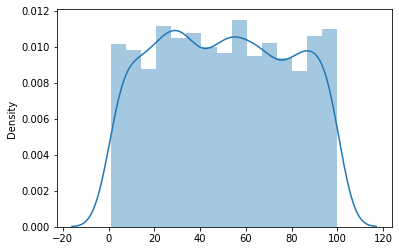

In [41]:
import seaborn as sns
sns.distplot(repo_a_list)

In [52]:
df.count()

24/07/28 14:09:31 WARN TaskSetManager: Stage 112 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


100000

In [71]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["yes"] and row['num_hours'] > 0 and row['engineer']:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 14:26:43 WARN TaskSetManager: Stage 159 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=67575)]

In [39]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] not in ["no", "yes", "true", "false"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]
print(row["completed"])

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 13:40:07 WARN TaskSetManager: Stage 71 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


yes


[Row(total=79983)]

In [30]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["false"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 13:30:47 WARN TaskSetManager: Stage 47 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=170471)]

In [31]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["no"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 13:30:56 WARN TaskSetManager: Stage 52 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=78494)]

In [131]:
completed_tickets_df = df.where((F.col("completed") == 'true') | (F.col("completed") == 'yes'))

completed_tickets_df = completed_tickets_df.selectExpr("inline(lines_per_repo)")



In [132]:
completed_tickets_df.count()

24/07/27 19:48:46 WARN TaskSetManager: Stage 279 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


128883

In [135]:
completed_tickets_df.head(10)

24/07/27 19:49:26 WARN TaskSetManager: Stage 285 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(A=None, B=None, C=None, D=None, E=None, F=None, G=52, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=23, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=31, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=42, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=1

In [136]:
repo_lines_df = completed_tickets_df.groupBy().sum().collect()[0].asDict()


24/07/27 19:50:41 WARN TaskSetManager: Stage 286 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


In [138]:
repo_lines_df

{'sum(A)': 247559,
 'sum(B)': 253158,
 'sum(C)': 250684,
 'sum(D)': 240933,
 'sum(E)': 248884,
 'sum(F)': 254996,
 'sum(G)': 246059,
 'sum(H)': 254152,
 'sum(I)': 242749,
 'sum(J)': 256171,
 'sum(K)': 251816,
 'sum(L)': 253104,
 'sum(M)': 253858,
 'sum(N)': 247243,
 'sum(O)': 245110,
 'sum(P)': 255385,
 'sum(Q)': 237914,
 'sum(R)': 252450,
 'sum(S)': 247105,
 'sum(T)': 252279,
 'sum(U)': 255304,
 'sum(V)': 246309,
 'sum(W)': 246937,
 'sum(X)': 245948,
 'sum(Y)': 252936,
 'sum(Z)': 251982}

In [43]:
df.where((F.col("completed") == "true") & (F.col("num_hours") > 0)).count()

24/07/29 19:35:59 WARN TaskSetManager: Stage 56 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


28320

In [13]:
df.where(F.col("completed") == "false").count()

24/07/28 21:17:04 WARN TaskSetManager: Stage 12 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


28562

In [14]:
df.where(F.col("completed") == "yes").count()

24/07/28 21:17:06 WARN TaskSetManager: Stage 15 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


14429

In [15]:
df.where(F.col("completed") == "no").count()

24/07/28 21:17:09 WARN TaskSetManager: Stage 18 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


14101

In [16]:
df.where(F.col("completed").isNull()).count()

24/07/28 21:17:11 WARN TaskSetManager: Stage 21 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


14285

In [17]:
print(all_upper_chars)

{'A': 576507, 'B': 583263, 'C': 575486, 'D': 579199, 'E': 578629, 'F': 587859, 'G': 579507, 'H': 589558, 'I': 578110, 'J': 589083, 'K': 579684, 'L': 584731, 'M': 585300, 'N': 570306, 'O': 581491, 'P': 578376, 'Q': 576703, 'R': 577720, 'S': 582853, 'T': 584022, 'U': 586047, 'V': 581735, 'W': 578261, 'X': 570098, 'Y': 578500, 'Z': 589610}


In [18]:
print(max_repo)

Z


In [ ]:
df_with_dates.show(2)

In [82]:
filtered_df = df_with_dates.where((F.col("date_clean") > '2023-05-31') & (F.col("date_clean") < "2023-07-01") & (F.col("num_hours")>=0))



In [83]:
filtered_df.count()

24/07/28 15:29:47 WARN TaskSetManager: Stage 202 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


7989

In [89]:
a = filtered_df.agg(F.mean("num_hours").alias("mean_hours"))

In [90]:
a.collect()

24/07/28 15:32:59 WARN TaskSetManager: Stage 208 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=50.224304209517776)]

In [87]:
401241.9663298375/8070

49.72019409291667

In [91]:
hash_util(f"[Row(mean_hours=50.224304209517776)]")

'0a15804cce114a019e52b696bba68912'

In [53]:
filtered_df = df_with_dates.where((F.col("date_clean") > '2023-05-31') & (F.col("date_clean") < "2023-07-01"))

In [54]:
filtered_df.count()

24/07/26 19:43:04 WARN TaskSetManager: Stage 47 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


8070

In [55]:
filtered_df.show(2)

24/07/26 19:43:09 WARN TaskSetManager: Stage 51 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
|                KPIs|completed|      date|engineer|jira_ticket_id|      lines_per_repo|         num_hours|num_slack_messages|  ticket_description|date_clean|
+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
|[{New Customer, 9...|    false|2023-06-22|    Josh|            22|[{null, null, nul...|45.486788049107695|               366|spitfire aorta ji...|2023-06-22|
|[{Support, 5590.8...|       no|2023-06-16|    Dale|            28|[{null, null, nul...| 3.239738889499544|               194|spheroid wobble c...|2023-06-16|
+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
only showing top 2 rows



In [56]:
num_hours = filtered_df.select(F.col("num_hours"))

num_hours.show(2)

24/07/26 19:43:12 WARN TaskSetManager: Stage 53 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+------------------+
|         num_hours|
+------------------+
|45.486788049107695|
| 3.239738889499544|
+------------------+
only showing top 2 rows



In [57]:
# sum_hours = F.sum(num_hours['num_hours'])

# sum_hours.show()

In [62]:
a = filtered_df.agg(F.sum("num_hours").alias("total_hours"))
a.show()

24/07/26 19:43:34 WARN TaskSetManager: Stage 54 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|      total_hours|
+-----------------+
|397287.8618578641|
+-----------------+



In [63]:
a = filtered_df.agg(F.mean("num_hours").alias("total_hours"))
a.show()

24/07/26 19:43:41 WARN TaskSetManager: Stage 57 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|      total_hours|
+-----------------+
|49.23021832191624|
+-----------------+



In [ ]:
397287.8618578641/8070

In [64]:
a = filtered_df.agg(F.avg("num_hours").alias("total_hours"))
a.show()

24/07/26 19:46:24 WARN TaskSetManager: Stage 60 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|      total_hours|
+-----------------+
|49.23021832191624|
+-----------------+



In [46]:
397287.8618578641/8070

49.23021832191624

In [107]:
a = filtered_df.agg(F.sum("num_hours").alias("total_hours"))
a.collect()

24/07/25 22:54:29 WARN TaskSetManager: Stage 123 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total_hours=397287.8618578641)]

In [72]:
filtered_df.agg(sum("num_hours").cast('double'))


# sum("steps").cast("long")

TypeError: unsupported operand type(s) for +: 'int' and 'str'